##########**TRABAJO FINAL- VISÓN 3D**#################

Importamos las librerías necesarias:

In [1]:
import numpy as np
import cv2
import glob #la librería glob sirve para encontrar los nombres de los archivos 
import matplotlib.pyplot as plt

Cargar las imagenes del tablero para la calibracion de la cámara y su previa detección con opencv de las esquinas y la lectura de las imagenes

In [2]:
#¡¡¡si hacemos .py da error al cargar imagenes!!!

# Cargar las imágenes corregidas del tablero de ajedrez que hemos hecho previamente
images = glob.glob('./undistorted_*.jpeg')

# Definimos los parámetros del tablero para la detección
square_size = 25  # Tamaño de cada cuadro
pattern_size = (7, 7)  # Número de cuadros del patrón de ajedrez
contador = 0

# Crear las coordenadas 3D reales de los puntos del tablero
object_points = np.zeros((np.prod(pattern_size), 3), np.float32) 

# Suponemos que el patrón es plano sobre z=0, y que cada cuadro tiene tamaño "square_size"
# Se genera una lista con las posiciones (x, y, 0) de cada esquina, organizadas en filas y columnas
object_points[:, :2] = np.indices(pattern_size).T.reshape(-1, 2) * square_size # 

# Listas para almacenar los puntos 3D y 2D
obj_points = []  # 3D objeto real el tablero
img_points = []   # 2D la imagen 

# Leer la primera imagen para obtener el tamaño
img = cv2.imread(images[0])
h, w = img.shape[:2]

# Definir parámetros de la cámara
camera_matrix = np.array([[w, 0, w / 2],
                          [0, w, h / 2],
                          [0, 0, 1]], dtype=np.float32)

dist_coeffs = np.zeros(4)  # distorsion 0 


for image_path in images:
    img = cv2.imread(image_path)
    
    # Convierte la imagen a escal de grises
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    # Detectar las esquinas
    ret, corners = cv2.findChessboardCorners(gray, pattern_size, None)

    if ret: #si detecta las esquinas las añade en la lista
        obj_points.append(object_points)  # añade los ptos 3d
        img_points.append(corners)  # Agregar ptos 2d
        cv2.drawChessboardCorners(img, pattern_size, corners, ret)# dibuja esquinas
        cv2.imshow('Imagen de ajedrez', img) #muestra imagen
        cv2.waitKey(500)  
    else: #por is no detecta las esquinas
        print("No se han encontrado esquinas",1 )

for i, (obj, img) in enumerate(zip(obj_points, img_points)):
    print(f"Imagen {i+1}: {len(obj)} puntos 3D - {len(img)} puntos 2D")

print(f"\nTotal de imágenes válidas: {len(obj_points)}")
print(f"Total de correspondencias: {len(obj_points) * len(object_points)}")
cv2.destroyAllWindows()


No se han encontrado esquinas 1
Imagen 1: 49 puntos 3D - 49 puntos 2D
Imagen 2: 49 puntos 3D - 49 puntos 2D
Imagen 3: 49 puntos 3D - 49 puntos 2D
Imagen 4: 49 puntos 3D - 49 puntos 2D
Imagen 5: 49 puntos 3D - 49 puntos 2D
Imagen 6: 49 puntos 3D - 49 puntos 2D
Imagen 7: 49 puntos 3D - 49 puntos 2D
Imagen 8: 49 puntos 3D - 49 puntos 2D
Imagen 9: 49 puntos 3D - 49 puntos 2D
Imagen 10: 49 puntos 3D - 49 puntos 2D
Imagen 11: 49 puntos 3D - 49 puntos 2D
Imagen 12: 49 puntos 3D - 49 puntos 2D
Imagen 13: 49 puntos 3D - 49 puntos 2D
Imagen 14: 49 puntos 3D - 49 puntos 2D
Imagen 15: 49 puntos 3D - 49 puntos 2D
Imagen 16: 49 puntos 3D - 49 puntos 2D
Imagen 17: 49 puntos 3D - 49 puntos 2D
Imagen 18: 49 puntos 3D - 49 puntos 2D
Imagen 19: 49 puntos 3D - 49 puntos 2D
Imagen 20: 49 puntos 3D - 49 puntos 2D

Total de imágenes válidas: 20
Total de correspondencias: 980


Algoritmo de calibracion que saca la matriz de proyeccion P

In [3]:
%run zhang_calibration.py

In [4]:
%run decompose_projection_matrix_lstsq.py

In [5]:
%run normalize_points.py

In [6]:
%run eight_point_algorithm.py

In [7]:
%run ransac_fundamental_matrix.py

In [8]:
%run detectar_coincidencias_SIFT.py

In [9]:
%run calcular_matriz_esencial.py

In [10]:

P = zhang_calibration(obj_points, img_points)

print("Matriz de proyección P:")
print(P)

Matriz de proyección P:
[[-9.07038493e-16 -9.17061566e-15 -1.64798730e-17  1.28733677e-12]
 [-3.35983373e-15 -3.84615946e-15 -1.73472348e-18  9.12448002e-13]
 [-4.96834084e-16  5.74815415e-16 -0.00000000e+00  1.00000000e+00]]


In [11]:
K, R, t = decompose_projection_matrix_lstsq(P)

print("Matriz intrínseca K:")
print(K)

print("Matriz de rotación R:")
print(R)

print("Vector de traslación t:")
print(t)

Matriz intrínseca K:
[[-0.0186731  -8.79618487 -8.35115851]
 [-0.         -6.65594083 -0.93814706]
 [ 0.          0.          1.        ]]
Matriz de rotación R:
[[-2.59525538e-04 -2.24317459e-04  9.99999941e-01]
 [ 7.56560784e-01  6.53923284e-01  3.43033274e-04]
 [-6.53923323e-01  7.56560829e-01 -1.92169349e-16]]
Vector de traslación t:
[-5.01245825e+17 -1.85514097e+14  1.31618048e+15]


In [12]:

# Cargar las imágenes izquierda y derecha
image_left = cv2.imread('izquierda.jpeg', cv2.IMREAD_GRAYSCALE)
image_right = cv2.imread('derecha.jpeg', cv2.IMREAD_GRAYSCALE)

x1, x2, matches = detectar_coincidencias_SIFT(image_left,image_right)
# Aplicar RANSAC para obtener la matriz fundamental
F, inliers = ransac_fundamental_matrix(x1, x2)

# Mostrar la matriz fundamental F
print("Matriz Fundamental F:")
print(F)

Buenas coicidencias 137
Matriz Fundamental F:
[[-8.78667639e-07 -3.13723647e-06  3.91598886e-03]
 [ 3.14559218e-06 -8.85620625e-07 -1.79649610e-03]
 [-2.67375478e-03  3.61594096e-03 -1.36113678e+00]]


In [13]:
E = calcular_matriz_esencial(F, K)

Matriz Esencial E:
[[-3.06378067e-10 -5.34240934e-07 -7.33156476e-05]
 [ 2.46633471e-07 -1.06730200e-04 -2.24095074e-02]
 [ 4.98453852e-05 -7.67148167e-04 -1.37327978e+00]]


In [14]:
%run process_and_show_matches_with_epilines.py

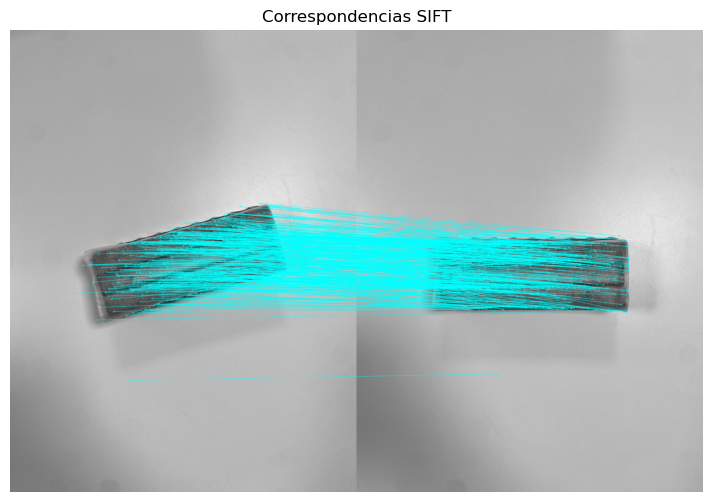

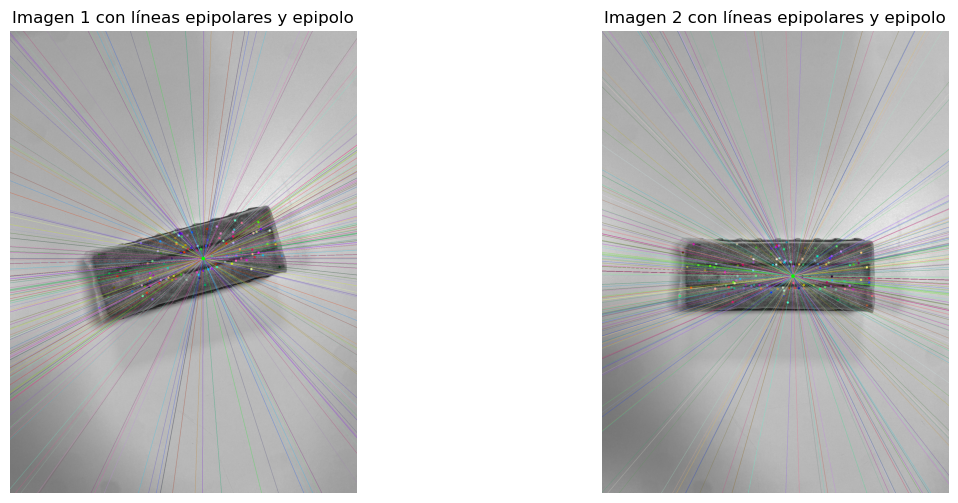

In [15]:
from process_and_show_matches_with_epilines import process_and_show_matches_with_epilines

process_and_show_matches_with_epilines('izquierda.jpeg', 'derecha.jpeg', F, x1, x2)